1. become one with the data
2. preprocess the data
3. create a model
4. fit the model
5. evaluate the model
6. adjust different hyperparameters and improve the model
7. repeat until satisfied

In [1]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2025-06-21 20:52:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   114MB/s    in 4.4s    

2025-06-21 20:52:21 (112 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [3]:
! ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 21 20:52 .
drwxr-xr-x  1 root root 4096 Jun 21 20:52 ..
drwxr-xr-x 12 root root 4096 Jun 21 20:52 test
drwxr-xr-x 12 root root 4096 Jun 21 20:52 train


In [4]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [5]:

import numpy as np
import pathlib

data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted({item.name for item in data_dir.glob('*')}))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape : {img.shape}")
  return img

image shape : (384, 512, 3)


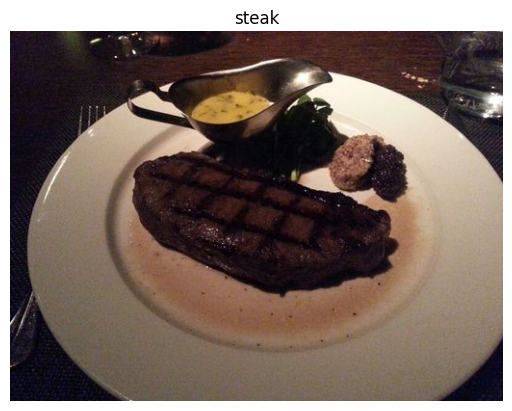

In [7]:
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")
test_data=train_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential



In [10]:
model=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")



])
model.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history=model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.1463 - loss: 2.2531

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 131ms/step - accuracy: 0.1465 - loss: 2.2528 - val_accuracy: 0.2676 - val_loss: 2.0683
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.3043 - loss: 1.9757 - val_accuracy: 0.2792 - val_loss: 1.9757
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - accuracy: 0.4674 - loss: 1.6033 - val_accuracy: 0.3280 - val_loss: 1.9434
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.6993 - loss: 0.9306 - val_accuracy: 0.2856 - val_loss: 2.5043
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9071 - loss: 0.3296 - val_accuracy: 0.2788 - val_loss: 3.4871


In [11]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.2646 - loss: 3.5269


[3.4871249198913574, 0.27880001068115234]

In [12]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

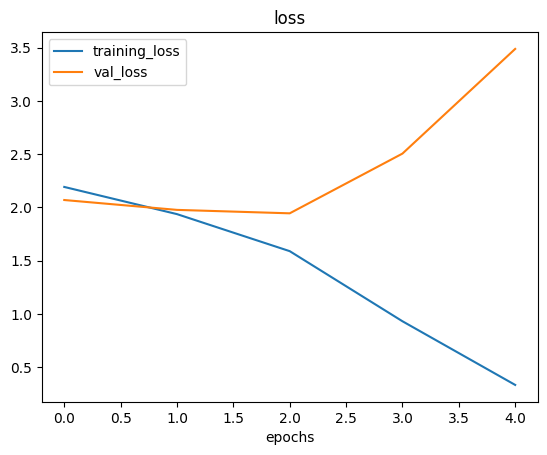

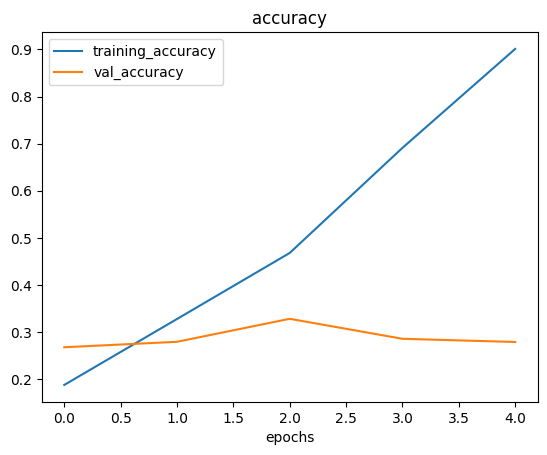

In [13]:
plot_loss_curves(history)

In [14]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 133ms/step - accuracy: 0.1944 - loss: 2.3575 - val_accuracy: 0.2860 - val_loss: 1.9654
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step - accuracy: 0.3724 - loss: 1.8237 - val_accuracy: 0.3564 - val_loss: 1.8518
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.4992 - loss: 1.5253 - val_accuracy: 0.3512 - val_loss: 1.9090
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.6659 - loss: 1.0918 - val_accuracy: 0.3424 - val_loss: 2.0239
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.8211 - loss: 0.6255 - val_accuracy: 0.3340 - val_loss: 2.3228


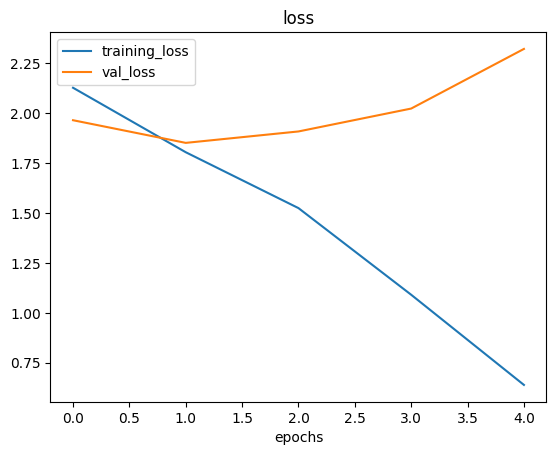

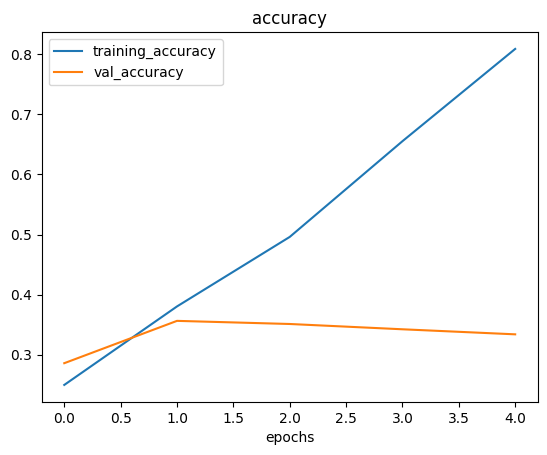

In [15]:
plot_loss_curves(history_1)

In [16]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True)
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [17]:
model_2=tf.keras.models.clone_model(model_1)
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 428ms/step - accuracy: 0.1267 - loss: 2.2992 - val_accuracy: 0.2512 - val_loss: 2.0873
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 462ms/step - accuracy: 0.2326 - loss: 2.1297 - val_accuracy: 0.2988 - val_loss: 1.9926
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.2752 - loss: 2.0702 - val_accuracy: 0.3080 - val_loss: 2.0225
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 159s 500ms/step - accuracy: 0.2871 - loss: 2.0518 - val_accuracy: 0.3360 - val_loss: 1.9174
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 162s 584ms/step - accuracy: 0.2864 - loss: 2.0269 - val_accuracy: 0.3476 - val_loss: 1.8532


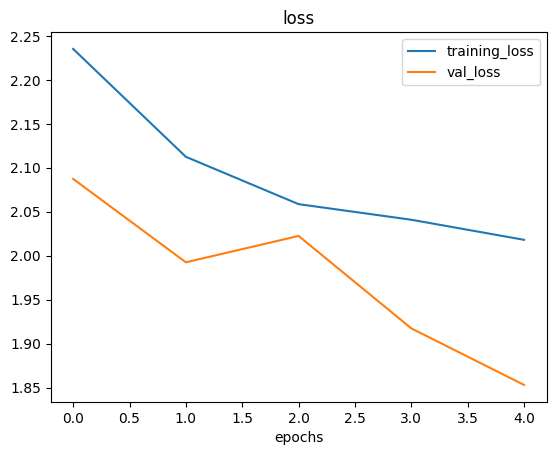

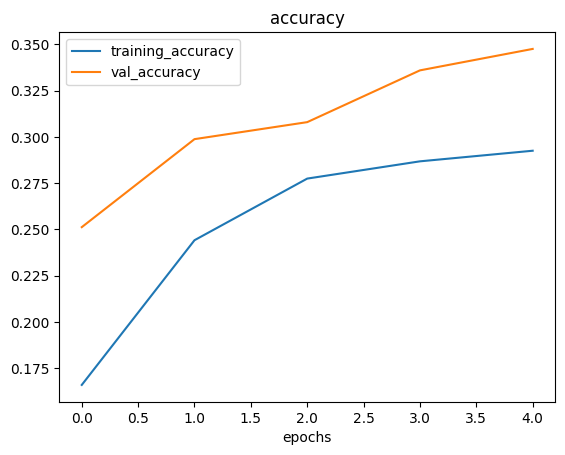

In [18]:
plot_loss_curves(history_2)

In [19]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [41]:
def pred_and_plot(model,filename,class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [42]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


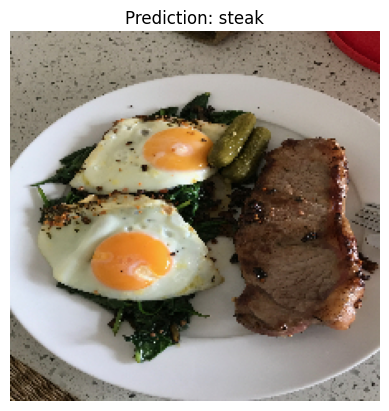

In [43]:
pred_and_plot(model=model_2,filename="//content/03-steak.jpeg",class_names=class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


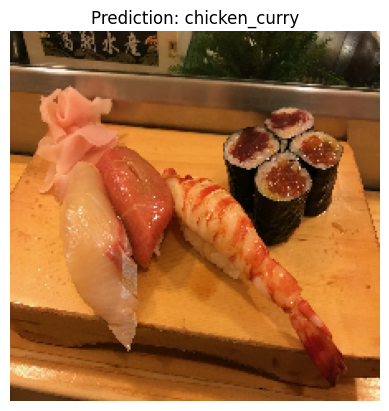

In [45]:

pred_and_plot(model=model_2,filename="/content/03-sushi.jpeg",class_names=class_names)